<a href="https://colab.research.google.com/github/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection/blob/master/ALAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/zahraDehghanian97/Adversarially-Learned-Anomaly-Detection

Cloning into 'Adversarially-Learned-Anomaly-Detection'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (693/693), done.
remote: Compressing objects: 100% (547/547), done.
remote: Total 759 (delta 302), reused 427 (delta 107), pack-reused 66
Receiving objects: 100% (759/759), 40.62 MiB | 34.21 MiB/s, done.
Resolving deltas: 100% (324/324), done.


In [3]:
cd /content/Adversarially-Learned-Anomaly-Detection/alad

/content/Adversarially-Learned-Anomaly-Detection/alad


In [4]:
ls

 arrhythmia_utilities.py  'loss discriminator.png'   run.py
 cifar10_utilities.py      __pycache__/              svhn_utilities.py
 kdd_utilities.py          results/


In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [11]:
!pip install wandb
import wandb
wandb.init()

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 142 kB 73.8 MB/s 
     |████████████████████████████████| 180 kB 63.5 MB/s 
     |████████████████████████████████| 97 kB 9.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=175dfe36c47e92b1de91336f30a4165ce4e24d4fba84ae49735ecb89958ca688
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=4c9f3322f058e6a6cd8698d8753c79605d6431fe894449251f1a061f7992ae0a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [18]:
!pip install psutil

In [33]:
!pip install GPUtil

In [30]:
import psutil
psutil.cpu_percent()


2.0

In [14]:
import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [15]:
print('Memory Usage:')
print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [35]:

!python run.py

Instructions for updating:
non-resource variables are not supported in the long term
(12000,)
ALAD is training with the following parameters:
Batch size:  32
Starting learning rate:  0.0002
EMA Decay:  0.999
Degree for L norms:  2
Anomalous label:  1
Score method:  
Discriminator zz enabled:  True
Spectral Norm enabled:  False
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'Tensor' object has no attribute 'to_proto'
Instructions for updating:
Use standard file utilities to get mtimes.
Instructions for updating:
Use standard fil

# **Draw Dxxzz Network**

In [7]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


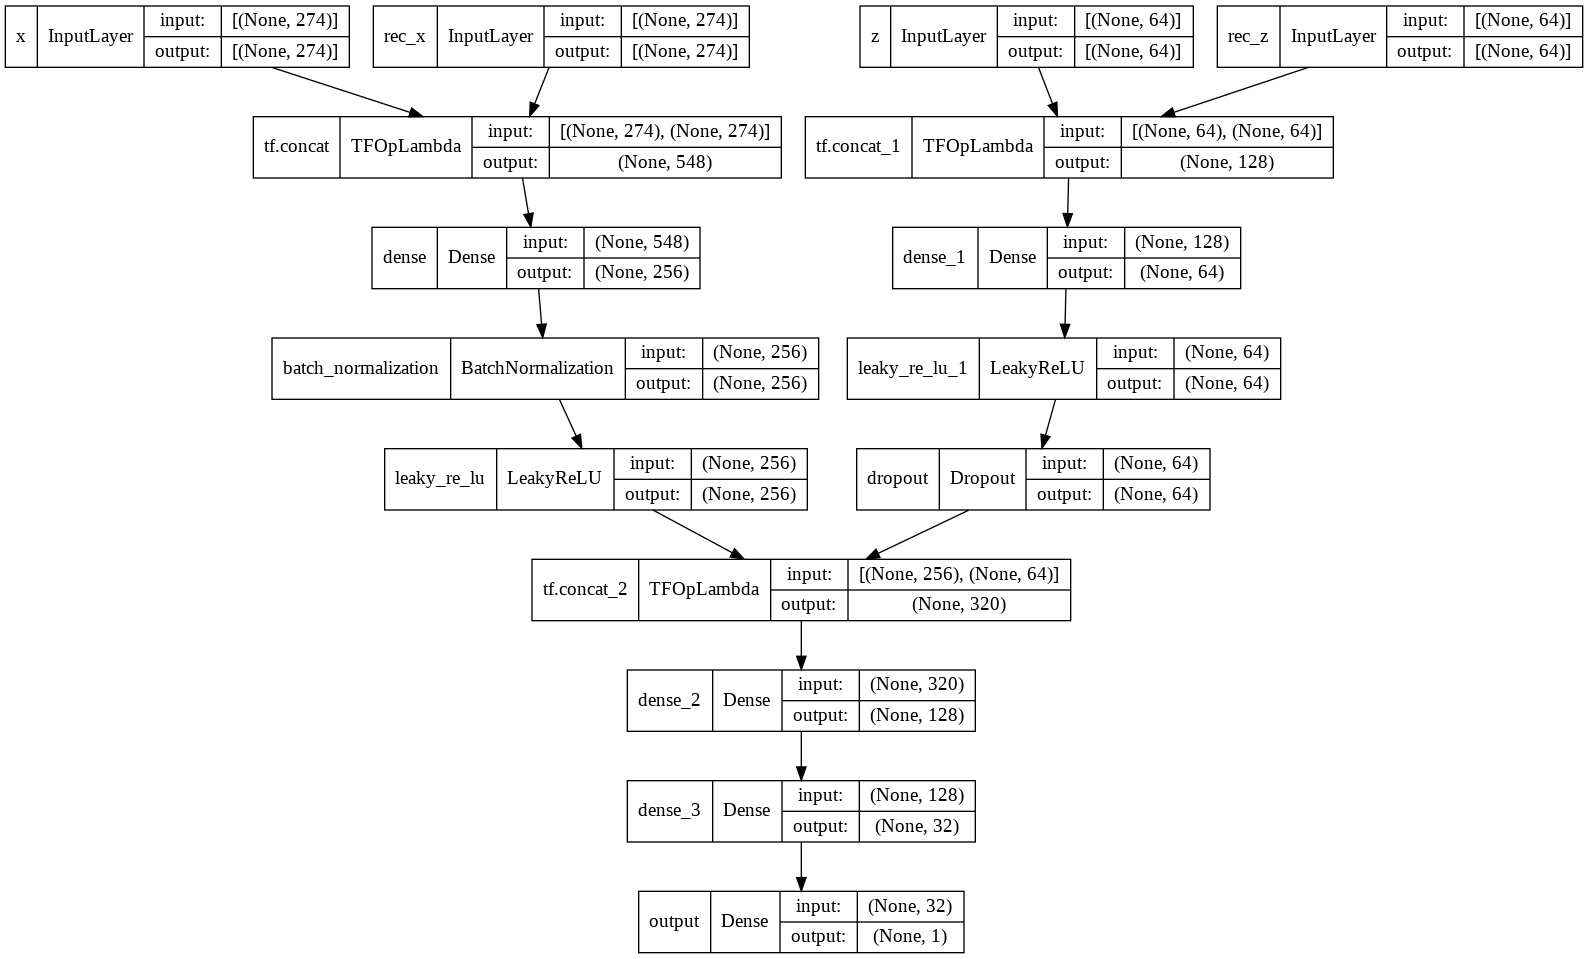

In [8]:

import tensorflow as tf

x = tf.keras.Input(shape=(274,), dtype='int32', name='x')
rec_x = tf.keras.Input(shape=(274,), dtype='int32', name='rec_x')
z = tf.keras.Input(shape=(64,), dtype='int32', name='z')
rec_z = tf.keras.Input(shape=(64,), dtype='int32', name='rec_z')

concat_x = tf.concat([x, rec_x], axis=1)
x1 = tf.keras.layers.Dense(256)(concat_x)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.LeakyReLU()(x1)

concat_z = tf.concat([z, rec_z], axis=1)
z1 = tf.keras.layers.Dense(64)(concat_z)
z1 = tf.keras.layers.LeakyReLU()(z1)
z1 = tf.keras.layers.Dropout(0.5)(z1)

y = tf.concat([x1, z1], axis=1)
y = tf.keras.layers.Dense(128, activation='relu')(y)
y = tf.keras.layers.Dense(32, activation='relu')(y)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(y)

model = tf.keras.Model(inputs=[x,rec_x,z,rec_z], outputs=[output])

tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96,
    layer_range=None, show_layer_activations=False)